# A.P. Moller Maersk Case Study

### Student Name:
- **Name:** Ananya Shetty
- **Email:** ananya.shetty.btech2021@sitpune.edu.in
- **Linkedin:** [linkedin.com/in/ananya-shetty](https://www.linkedin.com/in/ananya-shetty-123041230/)
- **Github:** [github.com/ananya-kshetty](https://github.com/ananya-kshetty)

**Given Information About Dataset**<br>
- Every row represents the sourcing of one unit of a particular product combination.<br>
- A unique product combination comprises of attributes mentioned in Columns A,B,C,D,E,F<br>
- Since each row represents 1 unit of sourcing; therefore, you will find multiple rows with the same combination in the training dataset. Imagine buying 1 quantity being represented as a single row.<br>
- July 20 to May 21 is your training set and June 21 is your test set; So using the 11 months data (Training Set: June 2020 to May 2021) you'd have the forecast / predict the June 2021 number (Test Set)<br>
- June 2021 has only a single value for each combination as that is your test set (target).<br>

**Objective**<br>
Iterate on ML models to come up closest to the Test set data using the Training Set Data.

**Expected**<br>
- Understand the data set (even with the open questions you have)<br>
- Do Exploratory Data Analysis.<br>
- Use Python and it's libraries for all your development needs.<br>
- Have a strategy for handling outliers / poor data quality on some rows.<br>
- Come up with approaches for forecasting the June 21 test set.<br>
- Compare and explain the different approaches you might have considered. (In your notebook)<br>
- Explain the final approach you have taken and why. (In your notebook)<br>

---

## Importing Required Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# print library versions
print("Pandas version: {}".format(pd.__version__))
print("Numpy version: {}".format(np.__version__))
print("Seaborn version: {}".format(sns.__version__))
print("Sklearn version: {}".format(sklearn.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))

Pandas version: 2.0.3
Numpy version: 1.25.2
Seaborn version: 0.13.1
Sklearn version: 1.2.2
Matplotlib version: 3.7.1


## Loading the Dataset

In [2]:
train = pd.read_csv('/content/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv', header=0)
test = pd.read_csv('/content/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv', header=0)

#### Preview datasets

In [3]:
train.head(10)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
5,NTM1,X1,A10,DIRECT,Large,Powder,Sep-20,137.93
6,NTM2,X1,A19,DIRECT,Large,Powder,Sep-20,105.59
7,NTM2,X1,A29,DIRECT,Small,Powder,Mar-21,90.78
8,NTM3,X1,A18,RETAIL,Large,Liquid,Nov-20,154.04
9,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71


In [4]:
test.head(10)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
5,NTM1,X1,A2,ECOM,Small,Powder,Jun-21,169.15
6,NTM1,X1,A28,DIRECT,Small,Powder,Jun-21,47.99
7,NTM1,X1,A29,DIRECT,Small,Powder,Jun-21,56.52
8,NTM1,X1,A3,DIRECT,Large,Liquid,Jun-21,125.51
9,NTM1,X1,A3,DIRECT,Large,Powder,Jun-21,157.27


#Data Preprocessing

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [6]:
train.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


<div class="alert alert-block alert-info"> The 'Sourcing Cost' column represents the cost associated with sourcing a particular product.

It has a mean value of approximately 108.82 units, with a standard deviation of around 104.39 units, indicating a considerable variation in costs. The distribution is skewed towards higher values, as evidenced by the large standard deviation and the presence of outliers, with the minimum value being -196.07 and the maximum value being 32632.50.</div>

In [7]:
train.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

Total of 8 columns in the dataset with NO MISSING VALUES!.</div>

In [8]:
train.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [9]:
for col in train.columns:
    print(col, "has", len(train[col].unique()),"unique values", '\n',train[col].unique(), '\n')

ProductType has 3 unique values 
 ['NTM3' 'NTM2' 'NTM1'] 

Manufacturer has 3 unique values 
 ['X1' 'X2' 'X3'] 

Area Code has 45 unique values 
 ['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26'] 

Sourcing Channel has 4 unique values 
 ['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM'] 

Product Size has 3 unique values 
 ['Large' 'Small' 'ExtraLarge'] 

Product Type has 2 unique values 
 ['Powder' 'Liquid'] 

Month of Sourcing has 11 unique values 
 ['May-21' 'Oct-20' 'Dec-20' 'Feb-21' 'Nov-20' 'Sep-20' 'Mar-21' 'Jan-21'
 'Apr-21' 'Jul-20' 'Aug-20'] 

Sourcing Cost has 4529 unique values 
 [1.016000e+01 1.342800e+02 1.246000e+01 ... 1.411072e+04 1.263047e+04
 3.705000e+03] 



### Preprocessing of Data

COnverting the **Month of Sourcing** column to datetime format and then extract the year and month from it.

In [10]:
train['Month of Sourcing'] = pd.to_datetime(train['Month of Sourcing'], format='%b-%y')
test['Month of Sourcing'] = pd.to_datetime(test['Month of Sourcing'], format='%b-%y')

train['Sourcing Year'] = train['Month of Sourcing'].dt.year
train['Sourcing Month'] = train['Month of Sourcing'].dt.strftime('%b')

In [11]:
test['Sourcing Year'] = test['Month of Sourcing'].dt.year
test['Sourcing Month'] = test['Month of Sourcing'].dt.strftime('%b')

In [12]:
train.head(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Sourcing Year,Sourcing Month
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16,2021,May
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28,2020,Oct
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46,2020,Dec
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22,2021,Feb
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76,2020,Nov


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
 8   Sourcing Year      550176 non-null  int32         
 9   Sourcing Month     550176 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 39.9+ MB


## Exploratory Data Analysis

Frequency Distribution Analysis

In [14]:
month_order = ['Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']
train['Sourcing_Month'] = train['Month of Sourcing'].dt.strftime('%b-%y')
train['Sourcing_Month_Num'] = train['Sourcing_Month'].map({month: i+1 for i, month in enumerate(month_order)})
train_sorted = train.sort_values(by=['Sourcing Year', 'Sourcing_Month_Num'])

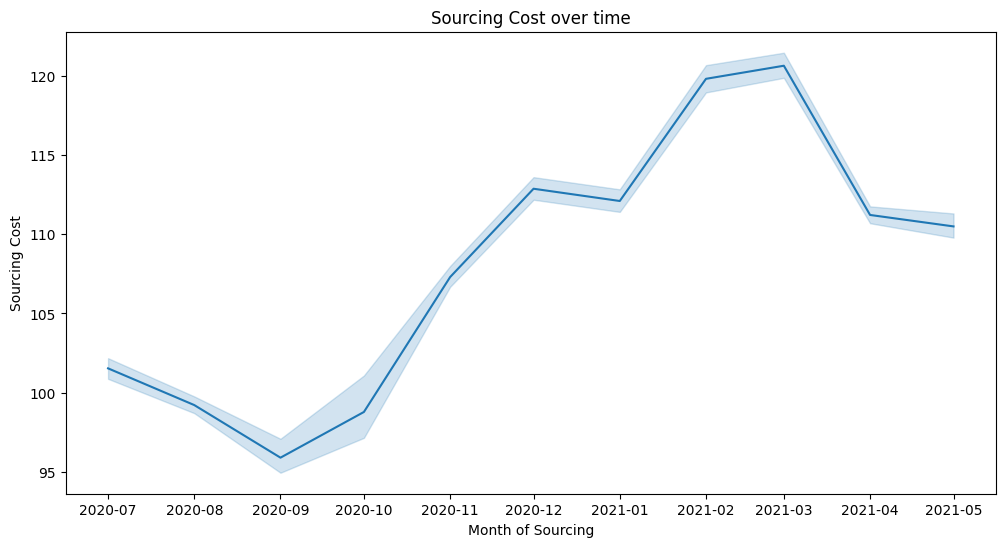

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', data=train)
plt.title('Sourcing Cost over time')
plt.show()

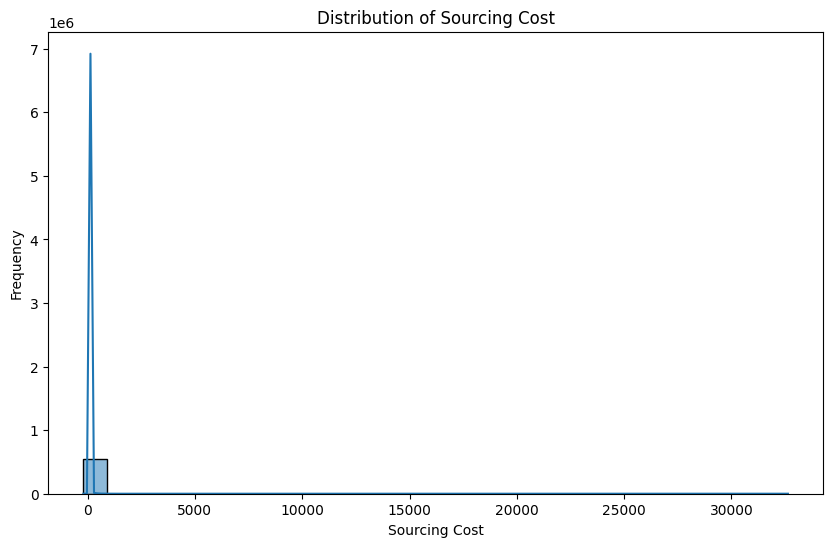

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Sourcing Cost'], bins=30, kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

### Average Sourcing Costs Visualization

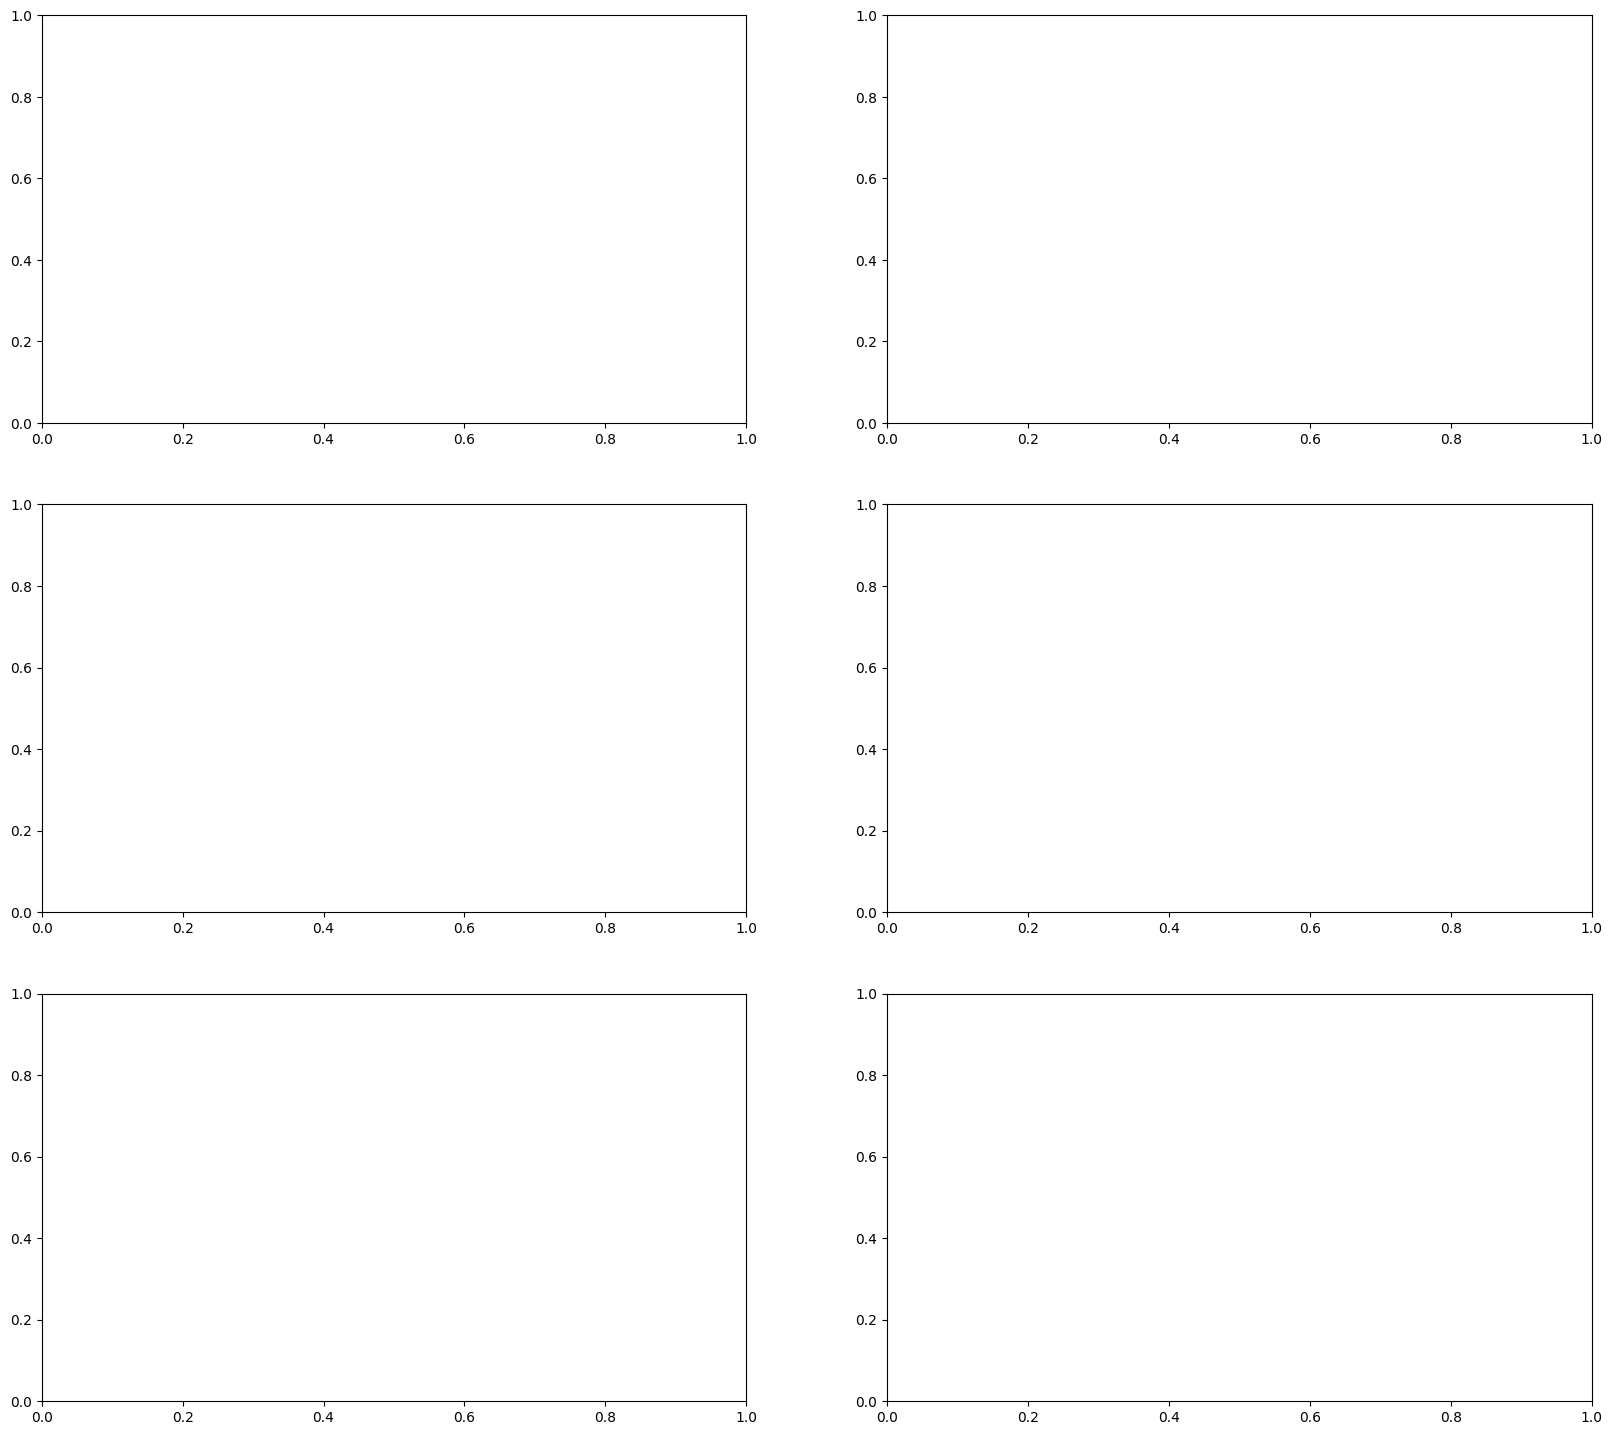

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(20, 18))

Analysis of Average Sourcing Costs

E-Commerce leads the driving source channel compared to other channels when measuring the average sourcing costs. </li>
X1 is also has the highest average sourcing costs compared to X2 and X3 which seem to have only around half of average sourcing costs of X1</li>
NTM1 and NTM2 and Powder Type Produts have a higher sourcing costs</li>
There are no activities happening in Area Code <i>A27

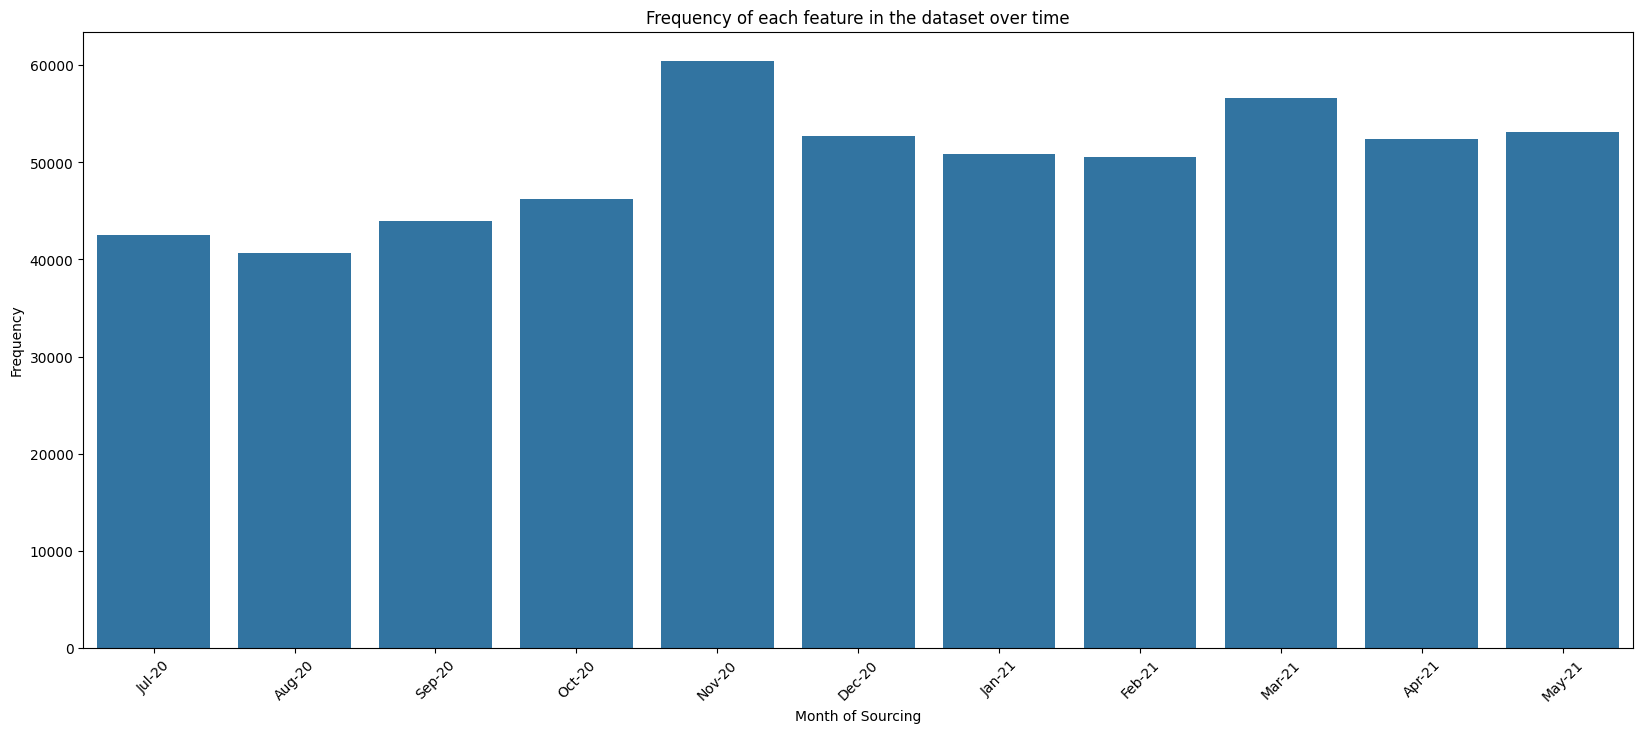

In [18]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Sourcing_Month', data=train_sorted, order=month_order)
plt.title('Frequency of each feature in the dataset over time')
plt.xlabel('Month of Sourcing')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Change in Sourcing Costs over time

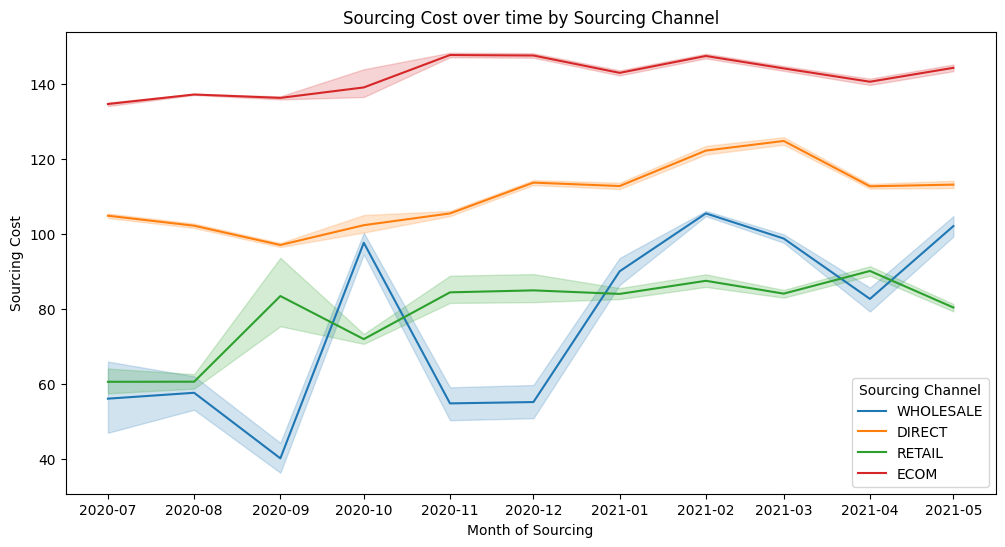

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Sourcing Channel', data=train)
plt.title('Sourcing Cost over time by Sourcing Channel')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Sourcing Channel')
plt.show()


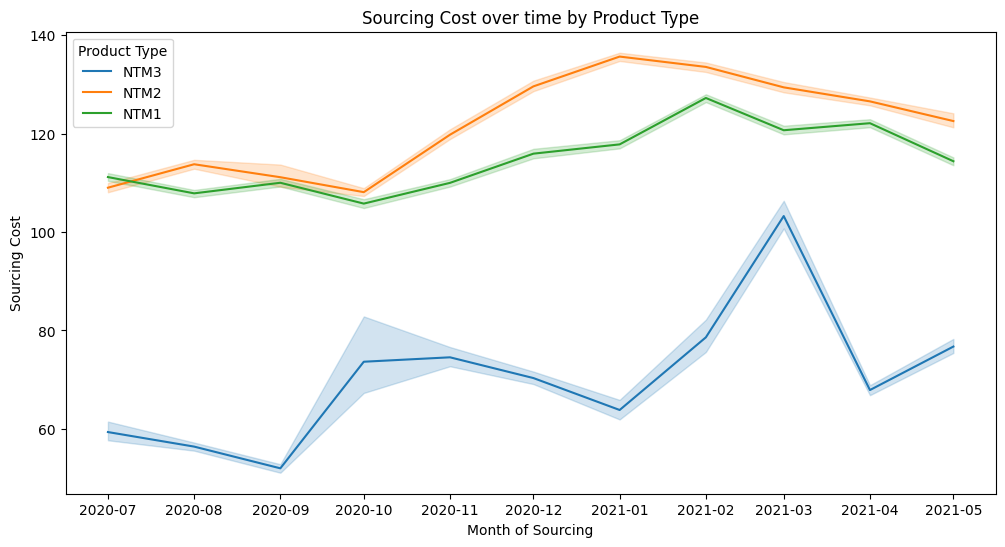

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='ProductType', data=train)
plt.title('Sourcing Cost over time by Product Type')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Type')
plt.show()

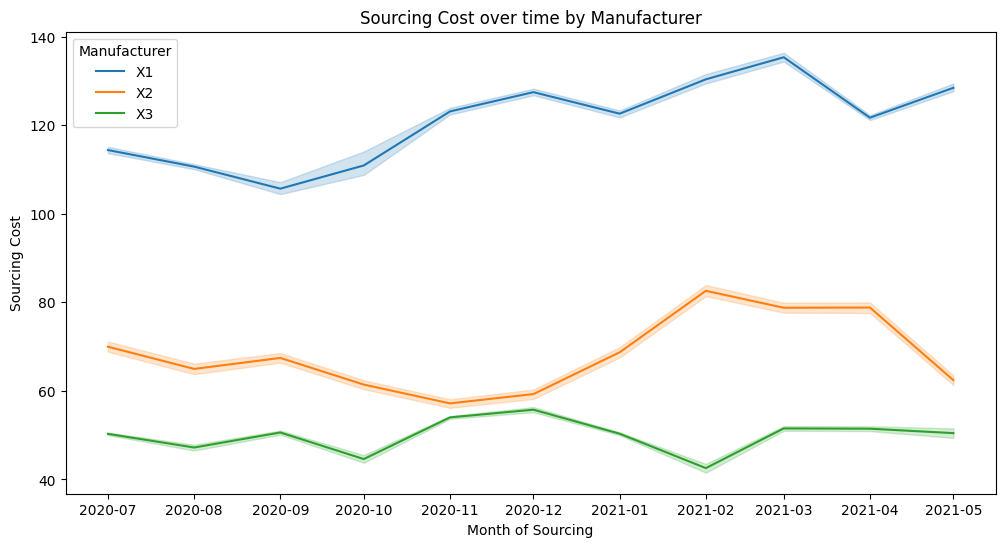

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Manufacturer', data=train)
plt.title('Sourcing Cost over time by Manufacturer')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Manufacturer')
plt.show()

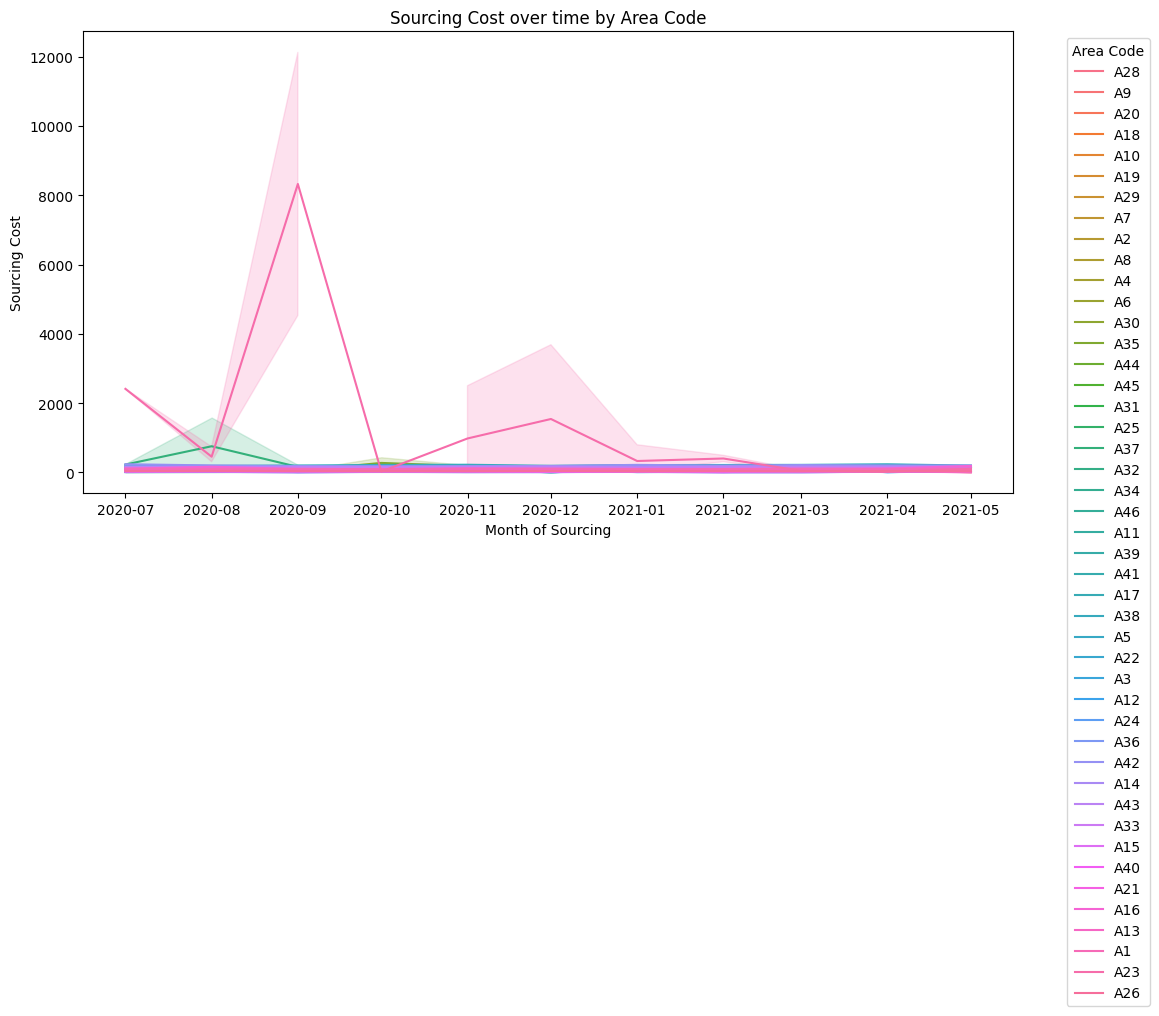

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Area Code', data=train)
plt.title('Sourcing Cost over time by Area Code')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Area Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

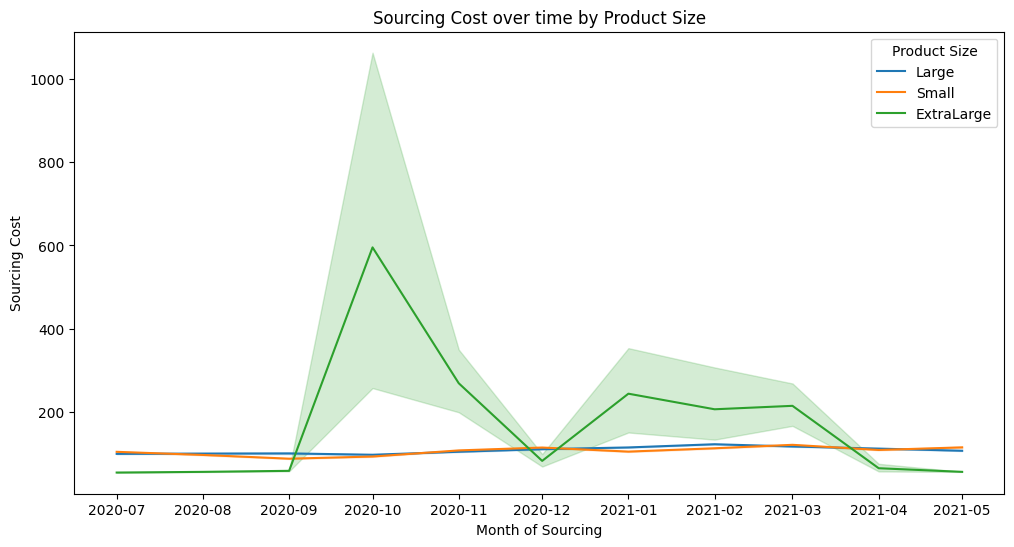

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Product Size', data=train)
plt.title('Sourcing Cost over time by Product Size')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Size')
plt.show()

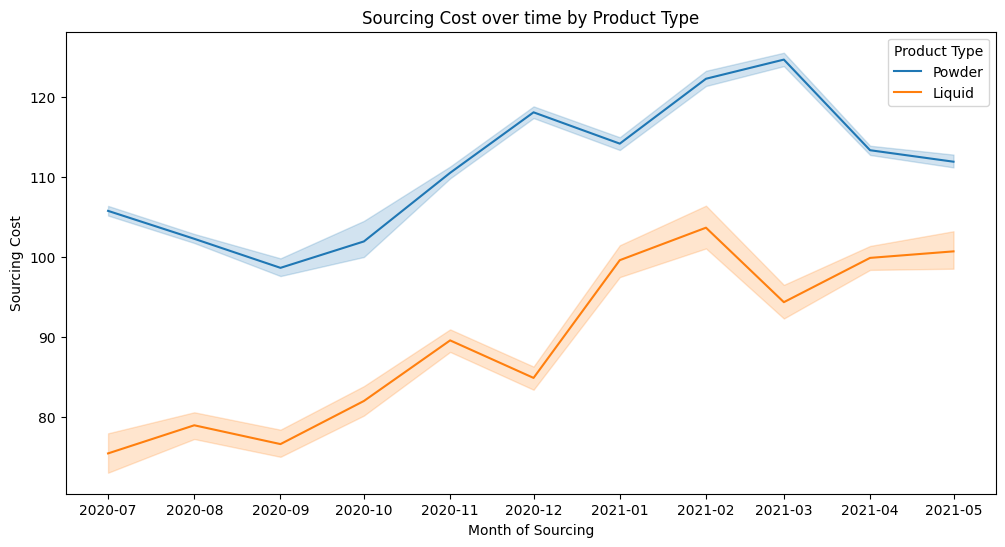

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', hue='Product Type', data=train)
plt.title('Sourcing Cost over time by Product Type')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Type')
plt.show()

Average Source Costing by Month

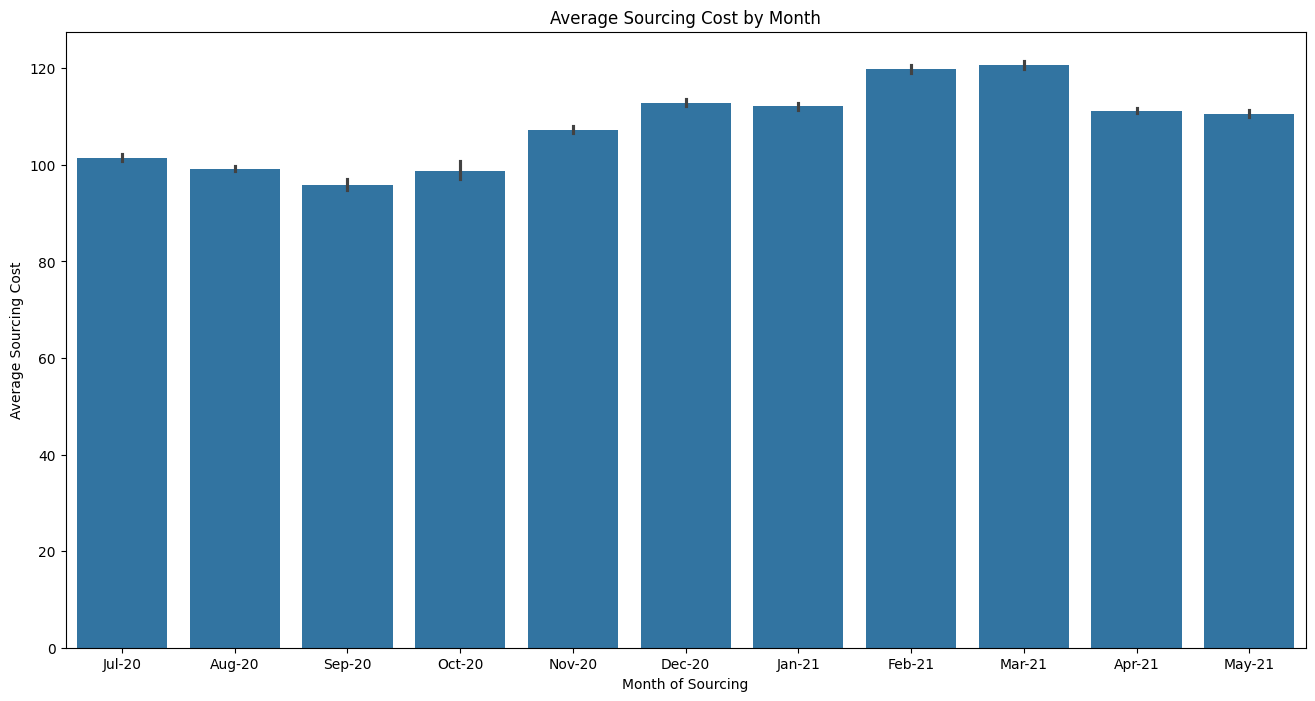

In [25]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Sourcing_Month', y='Sourcing Cost', data=train_sorted, order=month_order)
plt.title('Average Sourcing Cost by Month')
plt.xlabel('Month of Sourcing')
plt.ylabel('Average Sourcing Cost')
plt.show()

Sourcing Cost against Month for each Manufacture and Product Size

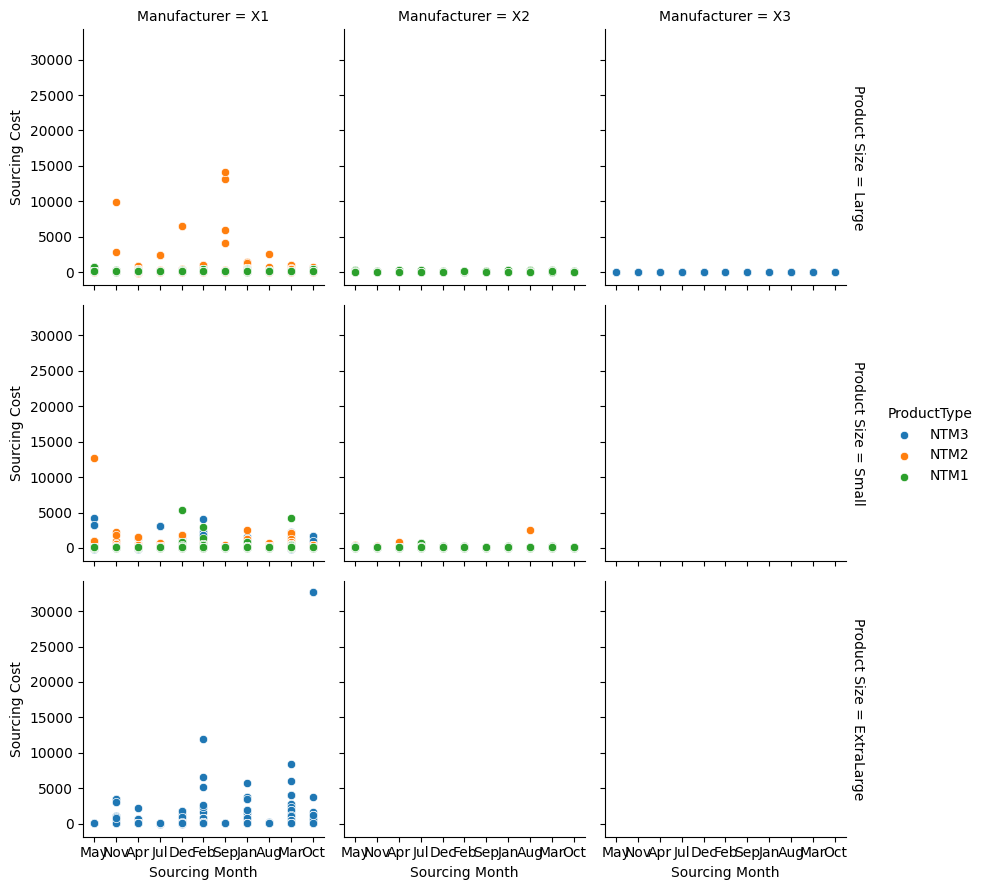

In [26]:
g = sns.FacetGrid(train, col='Manufacturer', row='Product Size', hue='ProductType', margin_titles=True)
g.map(sns.scatterplot, 'Sourcing Month', 'Sourcing Cost')
g.set_axis_labels('Sourcing Month', 'Sourcing Cost')
g.add_legend()
plt.show()

---
## Modeling

In [27]:
train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Sourcing Year,Sourcing Month,Sourcing_Month,Sourcing_Month_Num
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16,2021,May,May-21,11
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28,2020,Oct,Oct-20,4
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46,2020,Dec,Dec-20,6
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22,2021,Feb,Feb-21,8
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76,2020,Nov,Nov-20,5
...,...,...,...,...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.47,2020,Jul,Jul-20,1
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.56,2020,Oct,Oct-20,4
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.64,2021,Mar,Mar-21,9
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.04,2021,Feb,Feb-21,8


### Prepare Features and Target Variables

In [28]:
train['Month'] = train['Month of Sourcing'].dt.month
train['Year'] = train['Month of Sourcing'].dt.year

In [29]:
test['Month'] = test['Month of Sourcing'].dt.month
test['Year'] = test['Month of Sourcing'].dt.year

In [30]:
train_encoded = pd.get_dummies(train, columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])
test_encoded = pd.get_dummies(test, columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])

X_train = train_encoded.drop(['Month of Sourcing', 'Sourcing Cost', 'Sourcing Year', 'Sourcing Month', 'Sourcing_Month', 'Sourcing_Month_Num'], axis=1)
y_train = train_encoded['Sourcing Cost']
X_test = test_encoded.drop(['Month of Sourcing', 'Sourcing Cost', 'Sourcing Year', 'Sourcing Month'], axis=1)
y_test = test_encoded['Sourcing Cost']

In [32]:
train.isnull().sum()

ProductType           0
Manufacturer          0
Area Code             0
Sourcing Channel      0
Product Size          0
Product Type          0
Month of Sourcing     0
Sourcing Cost         0
Sourcing Year         0
Sourcing Month        0
Sourcing_Month        0
Sourcing_Month_Num    0
Month                 0
Year                  0
dtype: int64

### Decision Tree

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [34]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

In [35]:
dt_mse_train = mean_squared_error(y_train, y_pred_train_dt)
dt_rmse_train = np.sqrt(dt_mse_train)
dt_mae_train = mean_absolute_error(y_train, y_pred_train_dt)
dt_r2_train = r2_score(y_train, y_pred_train_dt)

dt_mse_test = mean_squared_error(y_test, y_pred_test_dt)
dt_rmse_test = np.sqrt(dt_mse_test)
dt_mae_test = mean_absolute_error(y_test, y_pred_test_dt)
dt_r2_test = r2_score(y_test, y_pred_test_dt)


print("Decision Tree Train MSE:", dt_mse_train)
print("Decision Tree Train RMSE:", dt_rmse_train)
print("Decision Tree Train MAE:", dt_mae_train)
print("Decision Tree Train R2 Score:", dt_r2_train)

print("\nDecision Tree Test MSE:", dt_mse_test)
print("Decision Tree Test RMSE:", dt_rmse_test)
print("Decision Tree Test MAE:", dt_mae_test)
print("Decision Tree Test R2 Score:", dt_r2_test)


Decision Tree Train MSE: 7208.582069900198
Decision Tree Train RMSE: 84.90336901383948
Decision Tree Train MAE: 12.597307080387814
Decision Tree Train R2 Score: 0.33849661837405776

Decision Tree Test MSE: 1074.0046737987361
Decision Tree Test RMSE: 32.772010524207026
Decision Tree Test MAE: 16.576718250669924
Decision Tree Test R2 Score: 0.6041204331864509


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_train_rf = random_forest_model.predict(X_train)
y_pred_test_rf = random_forest_model.predict(X_test)


In [37]:
rf_mse_train = mean_squared_error(y_train, y_pred_train_rf)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_mae_train = mean_absolute_error(y_train, y_pred_train_rf)
rf_r2_train = r2_score(y_train, y_pred_train_rf)

rf_mse_test = mean_squared_error(y_test, y_pred_test_rf)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_test = mean_absolute_error(y_test, y_pred_test_rf)
rf_r2_test = r2_score(y_test, y_pred_test_rf)

print("Random Forest Train MSE:", rf_mse_train)
print("Random Forest Train RMSE:", rf_rmse_train)
print("Random Forest Train MAE:", rf_mae_train)
print("Random Forest Train R2 Score:", rf_r2_train)

print("\nRandom Forest Test MSE:", rf_mse_test)
print("Random Forest Test RMSE:", rf_rmse_test)
print("Random Forest Test MAE:", rf_mae_test)
print("Random Forest Test R2 Score:", rf_r2_test)

Random Forest Train MSE: 7222.763838526561
Random Forest Train RMSE: 84.98684509102901
Random Forest Train MAE: 12.608931134070836
Random Forest Train R2 Score: 0.33719521293637145

Random Forest Test MSE: 1064.6981091611935
Random Forest Test RMSE: 32.629712060654064
Random Forest Test MAE: 16.52135973710835
Random Forest Test R2 Score: 0.6075508454249764


###Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

LinearRegression()

In [39]:
len(X_train.columns)

62

In [40]:
len(X_test.columns)

62

In [41]:
y_pred_train_lr = LR_model.predict(X_train)
y_pred_test_lr = LR_model.predict(X_test)

In [42]:
LR_mse_train = mean_squared_error(y_train, y_pred_train_lr)
LR_rmse_train = np.sqrt(LR_mse_train)
LR_mae_train = mean_absolute_error(y_train, y_pred_train_lr)
LR_r2_train = r2_score(y_train, y_pred_train_lr)

LR_mse_test = mean_squared_error(y_test, y_pred_test_lr)
LR_rmse_test = np.sqrt(LR_mse_test)
LR_mae_test = mean_absolute_error(y_test, y_pred_test_lr)
LR_r2_test = r2_score(y_test, y_pred_test_lr)


print("Linear Reg Train MSE:", LR_mse_train)
print("Linear Reg Train RMSE:", LR_rmse_train)
print("Linear Reg Train MAE:", LR_mae_train)
print("Linear Reg Train R2 Score:", LR_r2_train)

print("\nLinear Reg Test MSE:", LR_mse_test)
print("Linear Reg Test RMSE:", LR_rmse_test)
print("Linear Reg Test MAE:", LR_mae_test)
print("Linear Reg Test R2 Score:", LR_r2_test)

Linear Reg Train MSE: 8583.181544100205
Linear Reg Train RMSE: 92.64546154075873
Linear Reg Train MAE: 22.9580127541005
Linear Reg Train R2 Score: 0.21235500109798

Linear Reg Test MSE: 2693.1439693359375
Linear Reg Test RMSE: 51.895510107676344
Linear Reg Test MAE: 30.638984375000003
Linear Reg Test R2 Score: 0.007303511840185073


---
### Detecting and Removing Outliers

In [44]:
from scipy import stats

def remove_outliers(df):
    cleaned_df = df.copy()

    def detect_outliers_zscore(data):
        outliers = {}
        for column in data.columns:
            if pd.api.types.is_numeric_dtype(data[column]):
                z_scores = np.abs(stats.zscore(data[column]))
                outliers[column] = data[z_scores > 3]
        return outliers

    outliers = detect_outliers_zscore(cleaned_df)
    for column, df_outliers in outliers.items():
        cleaned_df = cleaned_df.drop(df_outliers.index)

    return cleaned_df

cleaned_train = remove_outliers(train)
cleaned_test = remove_outliers(test)

In [45]:
cleaned_train = cleaned_train.drop(['Sourcing_Month', 'Sourcing_Month_Num'], axis=1)

In [46]:
train_encoded = pd.get_dummies(cleaned_train, columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])
test_encoded = pd.get_dummies(cleaned_test, columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])

clean_X_train = train_encoded.drop(['Month of Sourcing', 'Sourcing Cost', 'Sourcing Year', 'Sourcing Month'], axis=1)
clean_y_train = train_encoded['Sourcing Cost']
clean_X_test = test_encoded.drop(['Month of Sourcing', 'Sourcing Cost', 'Sourcing Year', 'Sourcing Month'], axis=1)
clean_y_test = test_encoded['Sourcing Cost']

### Fitting cleaned data on Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(clean_X_train, clean_y_train)

clean_y_pred_train_dt = decision_tree_model.predict(clean_X_train)
clean_y_pred_test_dt = decision_tree_model.predict(clean_X_test)

In [52]:
clean_dt_mse_train = mean_squared_error(clean_y_train, clean_y_pred_train_dt)
clean_dt_rmse_train = np.sqrt(clean_dt_mse_train)
clean_dt_mae_train = mean_absolute_error(clean_y_train, clean_y_pred_train_dt)
clean_dt_r2_train = r2_score(clean_y_train, clean_y_pred_train_dt)

clean_dt_r2_test = r2_score(clean_y_test, clean_y_pred_test_dt)
clean_dt_mae_test = mean_absolute_error(clean_y_test, clean_y_pred_test_dt)
clean_dt_rmse_test = np.sqrt(clean_dt_mse_test)
clean_dt_mse_test = mean_squared_error(clean_y_test, clean_y_pred_test_dt)

print("Cleaned Decision Tree Train MSE:", clean_dt_mse_train)
print("Cleaned Decision Tree Train RMSE:", clean_dt_rmse_train)
print("Cleaned Decision Tree Train MAE:", dt_mae_train)
print("Cleaned Decision Tree Train R2 Score:", clean_dt_r2_train)

print("\nCleaned Decision Tree Test MSE:", clean_dt_mse_test)
print("Cleaned Decision Tree Test RMSE:", clean_dt_rmse_test)
print("Cleaned Decision Tree Test MAE:", dt_mae_test)
print("Cleaned Decision Tree Test R2 Score:", clean_dt_r2_test)

Cleaned Decision Tree Train MSE: 483.1438818650943
Cleaned Decision Tree Train RMSE: 21.980534157865552
Cleaned Decision Tree Train MAE: 12.597307080387814
Cleaned Decision Tree Train R2 Score: 0.8515221065795423

Cleaned Decision Tree Test MSE: 1073.760032138203
Cleaned Decision Tree Test RMSE: 32.76827783296222
Cleaned Decision Tree Test MAE: 16.576718250669924
Cleaned Decision Tree Test R2 Score: 0.604210608431456


In [53]:
cleaned_test['Predicted Sourcing Cost'] = clean_y_pred_test_dt
cleaned_test = cleaned_test.drop(['Sourcing Year', 'Sourcing Month', 'Month', 'Year'], axis=1)

cleaned_test

KeyError: "['Sourcing Year', 'Sourcing Month', 'Month', 'Year'] not found in axis"

In [54]:
cleaned_test['Difference'] = cleaned_test['Sourcing Cost'] - cleaned_test['Predicted Sourcing Cost']
cleaned_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Predicted Sourcing Cost,Difference
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-01,103.68,113.516164,-9.836164
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-01,155.75,154.202538,1.547462
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-01,143.02,149.619884,-6.599884
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-01,139.39,144.105425,-4.715425
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-01,169.42,171.041649,-1.621649
...,...,...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-01,89.57,64.613453,24.956547
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-01,114.57,120.910636,-6.340636
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-01,111.26,100.967861,10.292139
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-01,32.32,8.010102,24.309898


In [55]:
total_difference_sum = cleaned_test['Difference'].sum()
num_rows = cleaned_test.shape[0]
average_difference = total_difference_sum / num_rows

print("Average Deviation:", average_difference)

Average Deviation: -4.2290708807401165


In [56]:
cleaned_test.reset_index(drop=True, inplace=True)

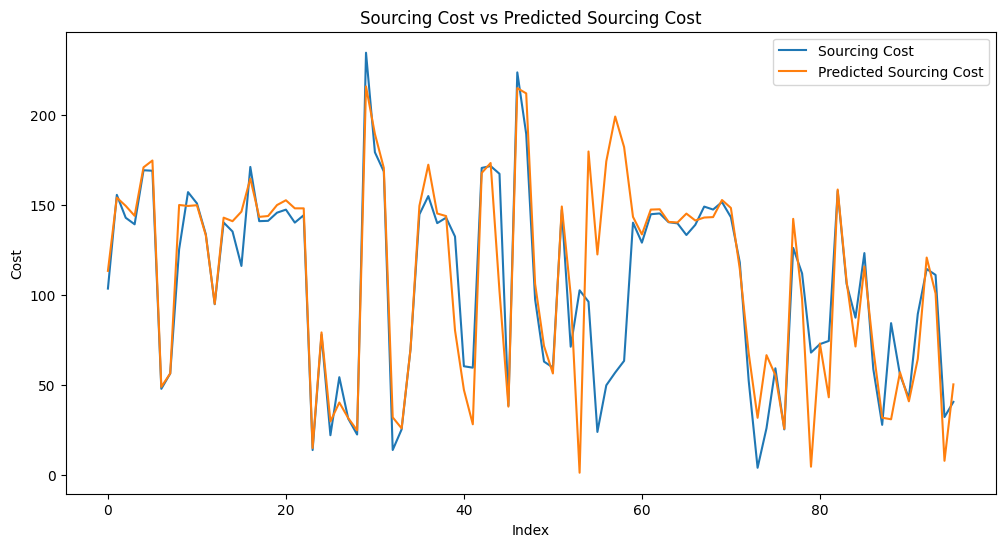

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_test.index, cleaned_test['Sourcing Cost'], label='Sourcing Cost')
plt.plot(cleaned_test.index, cleaned_test['Predicted Sourcing Cost'], label='Predicted Sourcing Cost')

plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Sourcing Cost vs Predicted Sourcing Cost')
plt.legend()

plt.show()